# Laboratorio 05
## Generación de Variables Aleatorias Continuas
Integrantes:
- Ricardo Méndez, 21289
- Sara Echeverría, 21371
- Melissa Pérez, 21385

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

### Task 01
Genere muestras aleatorias a partir de una distribución de probabilidad discreta personalizada mediante el método de aceptación-rechazo.

1. Defina una distribución de probabilidad discreta objetivo con valores y probabilidades especificados.
   - Función = \((x^2)/55\)

In [2]:
def pmfTarget(x):
    return (x**2) / 55

xValues = np.arange(1, 11)
pmfValues = np.array([pmfTarget(x) for x in xValues])
pmfValuesNormalized = pmfValues / np.sum(pmfValues)

2. Elija una distribución de propuesta con un soporte mayor que cubra el soporte de la distribución de destino.
   - N.B: El "soporte" de una variable aleatoria o distribución de probabilidad se refiere al conjunto de valores para los cuales la variable aleatoria tiene una probabilidad distinta de cero. En otras palabras, es el rango de valores donde la distribución de probabilidad es positiva.

In [3]:
pmfProposal = np.ones_like(pmfValuesNormalized) / len(pmfValuesNormalized)

3. Calcule la constante \(C\) para acotar la relación entre el PMF objetivo y el PMF propuesto.

In [4]:
C = np.max(pmfValuesNormalized / pmfProposal)

4. Implemente el método de aceptación-rechazo para generar muestras aleatorias a partir de la distribución discreta personalizada.

In [5]:
def acceptanceRejection(n):
    samples = []
    while len(samples) < n:
        y = np.random.choice(xValues, p=pmfProposal)
        u = np.random.uniform(0, 1)
        if u < (pmfTarget(y) / (C * pmfProposal[y-1])):
            samples.append(y)
    return samples

5. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución personalizada.

In [6]:
samples = acceptanceRejection(1000)

6. Trace un histograma de la muestra generada y compárelo con el PMF objetivo.

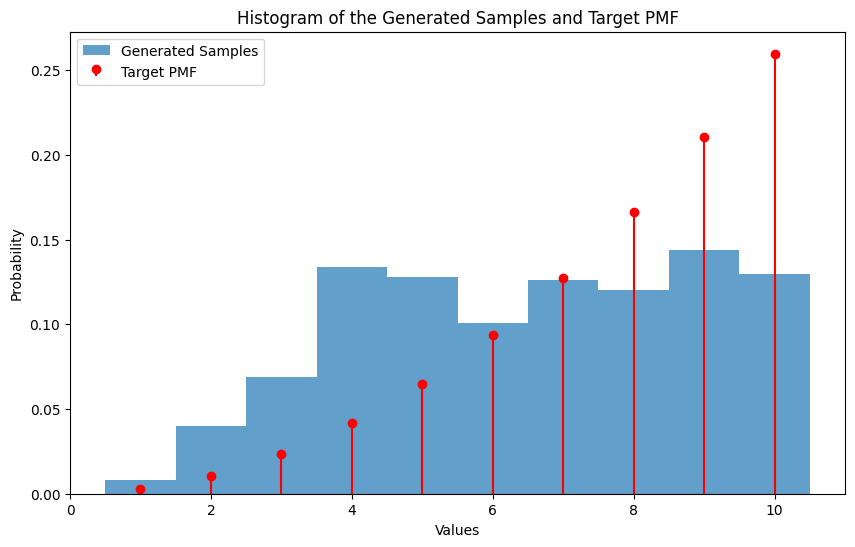

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=np.arange(0.5, 11.5, 1), alpha=0.7, label='Generated Samples', density=True)
plt.stem(xValues, pmfValuesNormalized, 'r', markerfmt='ro', basefmt=" ", label='Target PMF')
plt.title('Histogram of the Generated Samples and Target PMF')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Task 02
Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n, tenemos la variable aleatoria V con una función de probabilidad acumulada.
$$
F(x) = \sum_{i=1}^{n} p_i F_i(x)
$$

Donde p_i constituye una distribución probabilística
1. Describa un algoritmo para generar V
2. Demuestre que el algoritmo genera adecuadamente V

Hint: Probablemente le sea de utilidad el método de composición

### Algoritmo para Generar la Variable Aleatoria \( V \)

Para generar este algoritmo se pueden seguir estos pasos:

1. **Generar una Variable Aleatoria Uniforme:**
   - Genera un número aleatorio uniforme \( U \) en el intervalo \([0, 1]\). Esto se hace para seleccionar la función de distribución acumulada a usar.

2. **Seleccionar un Índice:**
   - Usa el valor de \( U \) para seleccionar un índice \( i \) en función de las probabilidades \( p_i \). Esto se logra calculando las probabilidades acumulativas \( S_i \) y comparando \( U \) con estos valores acumulativos para determinar en qué segmento cae \( U \).

3. **Generar una Muestra:**
   - Usa la función de distribución acumulada \( F_i(x) \) correspondiente al índice \( i \) seleccionado para generar una muestra \( X \). Esto generalmente se hace usando la inversa de \( F_i(x) \), aunque en algunos casos puedes usar métodos de generación directa.

4. **El Resultado es la Variable \( V \):**
   - La variable aleatoria \( V \) es igual a la muestra \( X \) generada en el paso anterior.

In [6]:
def generate_variable_V(n, p, F_list):
    # Paso 1: Generar una variable aleatoria uniforme U
    U = np.random.uniform()
    
    # Paso 2: Seleccionar el índice i
    cumulative_probs = np.cumsum(p)
    i = np.searchsorted(cumulative_probs, U)
    
    # Paso 3: Generar una muestra de la función acumulada F_i(x)
    x = np.random.rand()  
    
    F_i = F_list[i]
    V = F_i(x)
    
    return V

n = 3
p = [0.2, 0.5, 0.3]

F_list = [
    lambda x: x**2,           
    lambda x: x**3,           
    lambda x: 1 - np.exp(-x) 
]

for i in range(10):
    print(generate_variable_V(n, p, F_list))


0.0038634902409847775
0.047422122041323435
0.411049677405009
0.02889383090753798
0.3317778278216619
0.482727190323479
0.45321198876671887
0.5555098600559377
0.0024608042657129473
0.9393204290201446


### Task 03

Suponga que usted es gerente de proyecto en Inversiones Chileras S.A.; y debe elegir entre dos proyectos a realizar, la construcción de un Hotel o la construcción de un Centro Comercial. Los flujos de caja esperados para cada proyecto son los siguientes:

**Proyecto Hotel**

| Tiempo | Vt                      |
|--------|-------------------------|
| 0      | -800                    |
| 1      | normal(-800,50)         |
| 2      | normal(-800,100)        |
| 3      | normal(-700,150)        |
| 4      | normal(300,200)         |
| 5      | normal(500,200)         |
| 7      | uniform(200,8440)       |

**Proyecto Centro Comercial**

| Tiempo | Vt                      |
|--------|-------------------------|
| 0      | -900                    |
| 1      | normal(-600,50)         |
| 2      | normal(-400,50)         |
| 3      | normal(250,150)         |
| 4      | normal(250,150)         |
| 5      | normal(350,150)         |
| 7      | uniform(1600,6000)      |

Si el parámetro que quiere utilizar para comparar ambos proyectos es el Valor Presente Neto al 10% del costo de capital.

1. Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1,000 y 10,000 iteraciones.


In [2]:
np.random.seed(42)

# Descuento
r = 0.10

# Flujo de caja hotel
def flujo_hotel():
    return [
        -800,
        np.random.normal(-800, 50),
        np.random.normal(-800, 100),
        np.random.normal(-700, 150),
        np.random.normal(300, 200),
        np.random.normal(400, 200),
        np.random.normal(500, 200),
        np.random.uniform(200, 8440)
    ]

# Flujo de caja centro comercial
def flujo_centro_comercial():
    return [
        -900,
        np.random.normal(-600, 50),
        np.random.normal(-600, 100),
        np.random.normal(200, 50),
        np.random.normal(200, 150),
        np.random.normal(250, 150),
        np.random.normal(300, 150),
        np.random.uniform(1600, 6000)
    ]

In [3]:
# Función para calcular el VPN
def calcular_vpn(flujos):
    return sum(flujo / (1 + r)**t for t, flujo in enumerate(flujos))

# Simulación de Monte Carlo
def simular_vpn(flujo_proyecto, iteraciones):
    vpns = []
    for _ in range(iteraciones):
        flujos = flujo_proyecto()
        vpns.append(calcular_vpn(flujos))
    return np.mean(vpns), np.std(vpns)

In [4]:
# Número de iteraciones
iteraciones = [100, 1000, 10000]

# Simulaciones para cada proyecto y cada número de iteraciones
for iteracion in iteraciones:
    vpn_hotel, std_hotel = simular_vpn(flujo_hotel, iteracion)
    vpn_cc, std_cc = simular_vpn(flujo_centro_comercial, iteracion)
    
    print(f"Iteraciones: {iteracion}")
    print(f"Hotel: VPN medio = {vpn_hotel:.2f}, Desviación estándar = {std_hotel:.2f}")
    print(f"Centro Comercial: VPN medio = {vpn_cc:.2f}, Desviación estándar = {std_cc:.2f}")
    
    # Determinar el proyecto más rentable
    if vpn_hotel > vpn_cc:
        print("El Hotel es el proyecto más rentable.\n")
    else:
        print("El Centro Comercial es el proyecto más rentable.\n")

Iteraciones: 100
Hotel: VPN medio = 75.86, Desviación estándar = 1262.17
Centro Comercial: VPN medio = 686.45, Desviación estándar = 684.03
El Centro Comercial es el proyecto más rentable.

Iteraciones: 1000
Hotel: VPN medio = 163.03, Desviación estándar = 1225.54
Centro Comercial: VPN medio = 620.84, Desviación estándar = 678.09
El Centro Comercial es el proyecto más rentable.

Iteraciones: 10000
Hotel: VPN medio = 232.55, Desviación estándar = 1247.30
Centro Comercial: VPN medio = 624.19, Desviación estándar = 681.82
El Centro Comercial es el proyecto más rentable.



En las tres iteraciones, el centro comercial es el proyecto más rentable porque ha tenido un VPN medio mayor que el del Hotel. También, el Hotel tiene una desviación estándar más alta en comparación con el Centro Comercial, lo que indica una mayor incertidumbre en los resultados.